# Train different MAchine learning models for MINIST digit recognition



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifie

In [2]:
abc= pd.read_csv("C:/Users/Aarti Tupe Farkade/Documents/mnist_train.csv")
abc

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
abc.shape
abc.describe

<bound method NDFrame.describe of        label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

     

In [4]:
abc.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [5]:

#count the number of classes i.e  digits from 0-9 to identify any blasing towards a class by occurance/frequency
order = list(np.sort(abc['label'].unique()))
print (order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
num = []
for i in range(0,10):
    num.append(len(abc[abc['label']==i]))


In [7]:
data = {"digit": order,"count": num}
abc1 = pd.DataFrame(data=data)
abc1

,digit,count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


# visualizing the number of class i.e digit and count in the dataset

Text(0.5, 1.0, 'Number of digit classes')

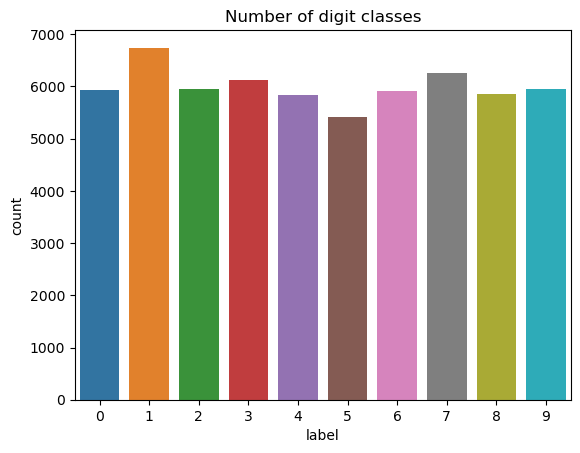

In [45]:
import seaborn as sns
plt.plot(figure = (16,10))
f = sns.countplot(x= 'label',data = abc)
plt.title("Number of digit classes")

In [9]:
#seprating the x and y variable(x = feature ,y= target)
abc
x = abc.drop(['label'] ,axis = 1)
y = abc['label']
x.shape
y.shape

(60000,)

In [10]:
#normalize the data,all the values lies between 0 to 255 , divide all the vlaues by 255 they will lie between 0 and 1

x = x/255.0
print('x:',x.shape)

x: (60000, 784)


In [11]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale = MinMaxScaler()
x = minmaxscale.fit_transform(x)

In [12]:
#Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify = y)

In [13]:
sys.getsizeof(x_train)
sys.getsizeof(y_train)
sys.getsizeof(x_test)
sys.getsizeof(y_test)


288016

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify = y)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(42000, 784) (18000, 784) (42000,) (18000,)


In [16]:
#Train the model
#1) RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
def train_mnist_model(x_train, y_train):
    models = {
        "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4,
                                                         bootstrap=True, n_jobs=-1, random_state=0),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
        "SVM": SVC(kernel='rbf'),
        "K-nn": KNeighborsClassifier(n_neighbors=5),
        "Logistic Regression": LogisticRegression(max_iter=100)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[model_name] = model
        
    return trained_models

In [17]:
#evaluate and test the mnist test data
def test_and_evaluate_mnist_model(models, x_test, y_test):
    results = {}
    for model_name, model in models.items():
        y_pred = model.predict(x_test)
        # Evaluate models
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1score = f1_score(y_test, y_pred, average='macro')
        classificationReport = classification_report(y_test, y_pred)
        results[model_name] = {
            "Confusion Matrix": confusion_matrix_result,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1score,
            "Classification Report": classificationReport
        }
    return results

In [18]:
trained_models = train_mnist_model(x_train,y_train)

C:\Users\Aarti Tupe Farkade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
evaluation_results = test_and_evaluate_mnist_model(trained_models,x_test,y_test)


C:\Users\Aarti Tupe Farkade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aarti Tupe Farkade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aarti Tupe Farkade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aarti Tupe Farkade\a

In [32]:
from timeit import default_timer as timer

start=timer()
for model_name, metrics in evaluation_results.items():
    print(f"{model_name} Evaluation")
    print("\n****** Confusion Matrix ******\n")
    print(metrics['Confusion Matrix'])
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    if 'F1 Score' in metrics:
        f1 = metrics['F1 Score']
        print(f"F1 Score: {f1:.2f}")
    else:
        print("F1 Score not available in metrics dictionary.")
    print("****** Classification Report ******")
    print(metrics['Classification Report'])
    print()

# Save the trained models to files
import joblib

for model_name, model_data in trained_models.items():
    model_filename = f"{model_name.lower().replace(' ', '_')}_mnist_model.pkl"



RandomForestClassifier Evaluation

****** Confusion Matrix ******

[[1690    3    5    6    1    1   25   14   31    1]
 [   0 2003    7    0    1    0    1    7    3    1]
 [  60  273 1234   27   24    1   61   68   30    9]
 [  86  186   57 1305    9    7    9   73   38   69]
 [  22   24    5    1 1328    0   71   89   23  190]
 [ 195  143   10  502   71  356   53   81   79  136]
 [  82   65   28   14   49    5 1490   22   17    3]
 [  28   97   43    2   36    0    0 1613   18   43]
 [  22  289   37  105   23    7   38   27 1116   91]
 [  20   49    8   32   98    0   12  255   19 1292]]
Accuracy: 0.75
Precision: 0.78
Recall: 0.74
F1 Score: 0.73
****** Classification Report ******
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1777
           1       0.64      0.99      0.78      2023
           2       0.86      0.69      0.77      1787
           3       0.65      0.71      0.68      1839
           4       0.81      0.76   

In [38]:
# Save the trained models to files
import joblib

for model_name, model_data in trained_models.items():
    model_filename = f"{model_name.lower().replace(' ', '_')}_mnist_model.pkl"
    joblib.dump(trained_models [model_name], model_filename)


In [39]:
#find the model with the correct accuracy
best_model_name = max(evaluation_results, key=lambda model: evaluation_results[model]["Accuracy"])
best_model_accuracy = evaluation_results[best_model_name]["Accuracy"]
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")

The best model is SVM with an accuracy of 0.97


In [40]:
#make the visualization of models
import matplotlib.pyplot as plt

# Extract model names and their corresponding evaluation values
model_names = list(evaluation_results.keys())
accuracies = [results["Accuracy"] for results in evaluation_results.values()]
precisions = [results["Precision"] for results in evaluation_results.values()]
recalls = [results["Recall"] for results in evaluation_results.values()]

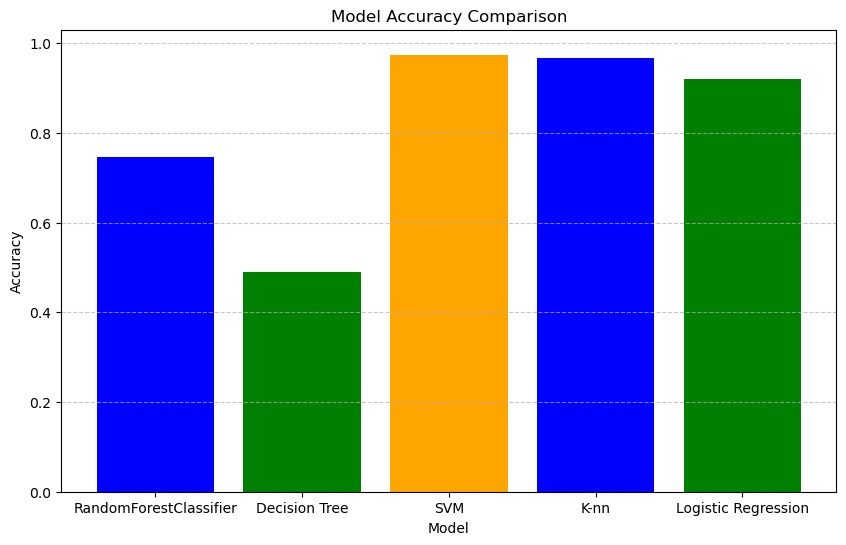

In [41]:
plt.figure(figsize=(10, 6))  # Use parentheses to specify the figure size

plt.bar(model_names, accuracies, color=["blue", "green", "orange"])  # Specify colors in a list

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

plt.ylim(0.0, 1.03)  # Set the y-axis limits

plt.grid(axis="y", linestyle='--', alpha=0.7)  # Correct the grid parameters

plt.show()

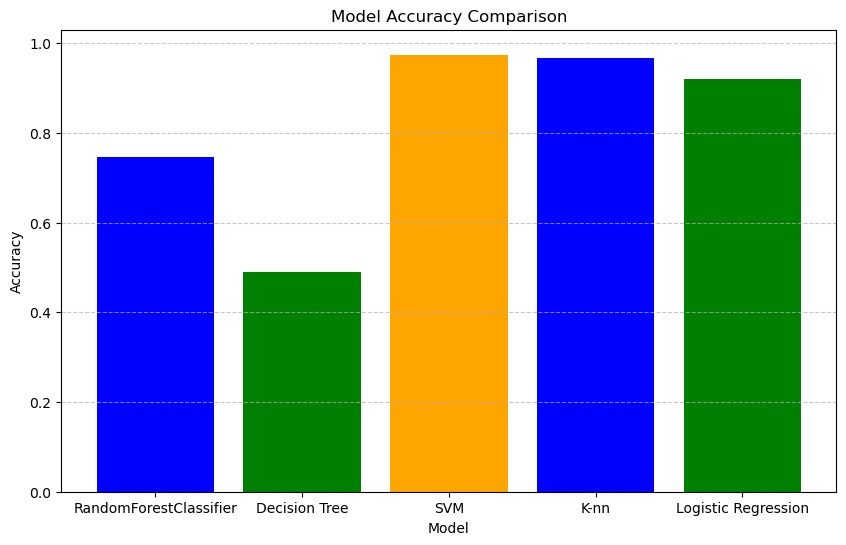

In [43]:
#create a bar plot for precisionn
plt.figure(figsize=(10, 6))  # Use parentheses to specify the figure size

plt.bar(model_names, accuracies, color=["blue", "green", "orange"])  # Specify colors in a list

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

plt.ylim(0.0, 1.03)  # Set the y-axis limits

plt.grid(axis="y", linestyle='--', alpha=0.7)  # Correct the grid parameters

plt.show()

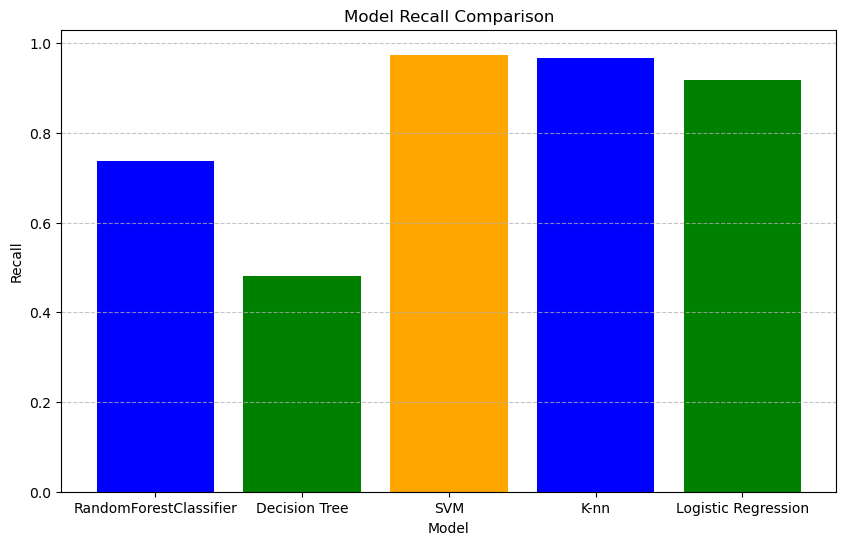

In [44]:
#create a bar plot for recall for each model
plt.figure(figsize=(10, 6))

plt.bar(model_names, recalls, color=['blue', 'green', 'orange'])  # Color values in a list

plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Model Recall Comparison")

plt.ylim(0.0, 1.03)  # Set the y-axis limits

plt.grid(axis="y", linestyle='--', alpha=0.75)

plt.show()